## Problem 4 Instruments

1.波形和快速傅里叶计算

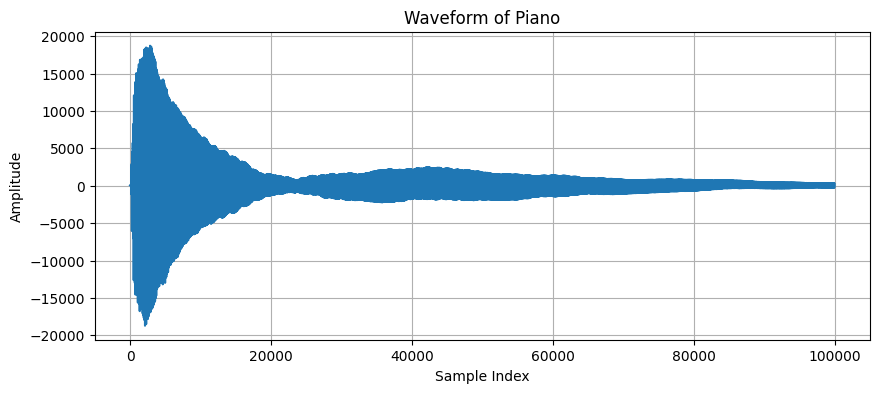

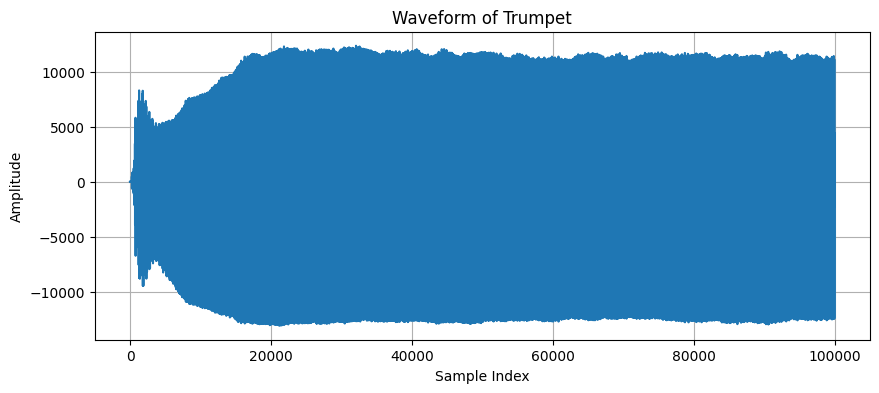

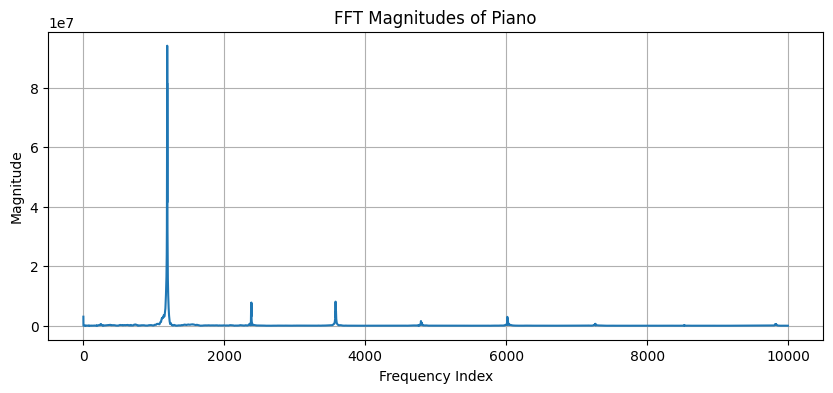

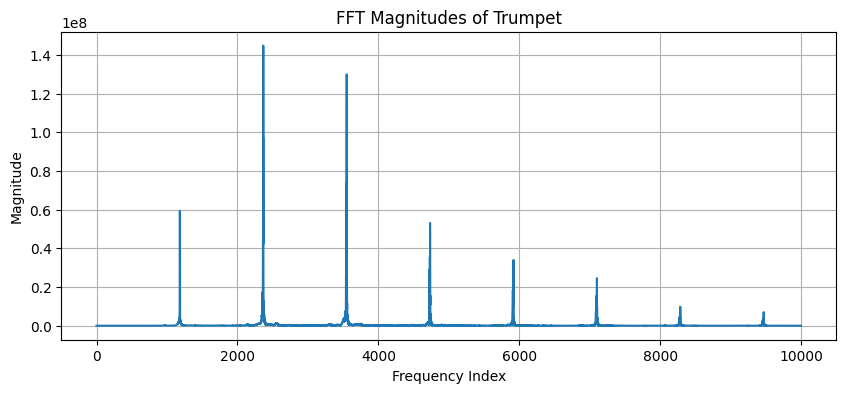

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def read_waveform(file_name):
    """读取波形数据文件"""
    with open(file_name, 'r') as file:
        data = np.array([float(line.strip()) for line in file])
    return data

def plot_waveform(data, title):
    """绘制波形图"""
    plt.figure(figsize=(10, 4))
    plt.plot(data)
    plt.title(f"Waveform of {title}")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

def perform_fft(data):
    """执行快速傅里叶变换并返回幅度"""
    fft_result = np.fft.fft(data)
    return np.abs(fft_result)

def plot_fft(fft_magnitudes, title, num_coeffs=10000):
    """绘制FFT结果的前num_coeffs个系数的大小"""
    plt.figure(figsize=(10, 4))
    plt.plot(fft_magnitudes[:num_coeffs])
    plt.title(f"FFT Magnitudes of {title}")
    plt.xlabel("Frequency Index")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.show()

# 读取数据
piano_data = read_waveform("piano.txt")
trumpet_data = read_waveform("trumpet.txt")

# 绘制波形图
plot_waveform(piano_data, "Piano")
plot_waveform(trumpet_data, "Trumpet")

# 计算FFT
piano_fft = perform_fft(piano_data)
trumpet_fft = perform_fft(trumpet_data)

# 绘制FFT图
plot_fft(piano_fft, "Piano")
plot_fft(trumpet_fft, "Trumpet")


2.音符检测

In [4]:
def find_fundamental_frequency(fft_magnitudes, sample_rate, data_length):
    """找到基频"""
    # 找到最大振幅的索引
    fundamental_index = np.argmax(fft_magnitudes[:data_length // 2])  # 只考虑一半范围
    # 转换索引到频率
    fundamental_freq = fundamental_index * sample_rate / data_length
    return fundamental_freq

def note_from_frequency(freq):
    """根据频率确定音符，基于中央C是261Hz"""
    C4 = 261.63  # 更精确的中央C频率
    if freq >= C4 * 0.98 and freq <= C4 * 1.02:
        return "C4 (Middle C)"
    # 添加其他音符的检测逻辑
    return f"Frequency {freq:.2f} Hz does not closely match Middle C"

# 计算基频
piano_freq = find_fundamental_frequency(piano_fft, 44100, len(piano_data))
trumpet_freq = find_fundamental_frequency(trumpet_fft, 44100, len(trumpet_data))

# 确定音符
piano_note = note_from_frequency(piano_freq)
trumpet_note = note_from_frequency(trumpet_freq)

print(f"Piano is playing: {piano_note}")
print(f"Trumpet is playing: {trumpet_note}")


Piano is playing: Frequency 524.79 Hz does not closely match Middle C
Trumpet is playing: Frequency 1043.85 Hz does not closely match Middle C


钢琴演奏C5
小号演奏C6

## Problem 5 Sunspot

1.1  太阳黑子的月观测图

<>:5: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
C:\Users\dell\AppData\Local\Temp\ipykernel_16280\961658961.py:5: SyntaxWarning: invalid escape sequence '\C'
  file_path = 'C:\我的文件\李保升的文件\Computational_Physics_Homework\week 13th\SN_m_tot_V2.0.csv'


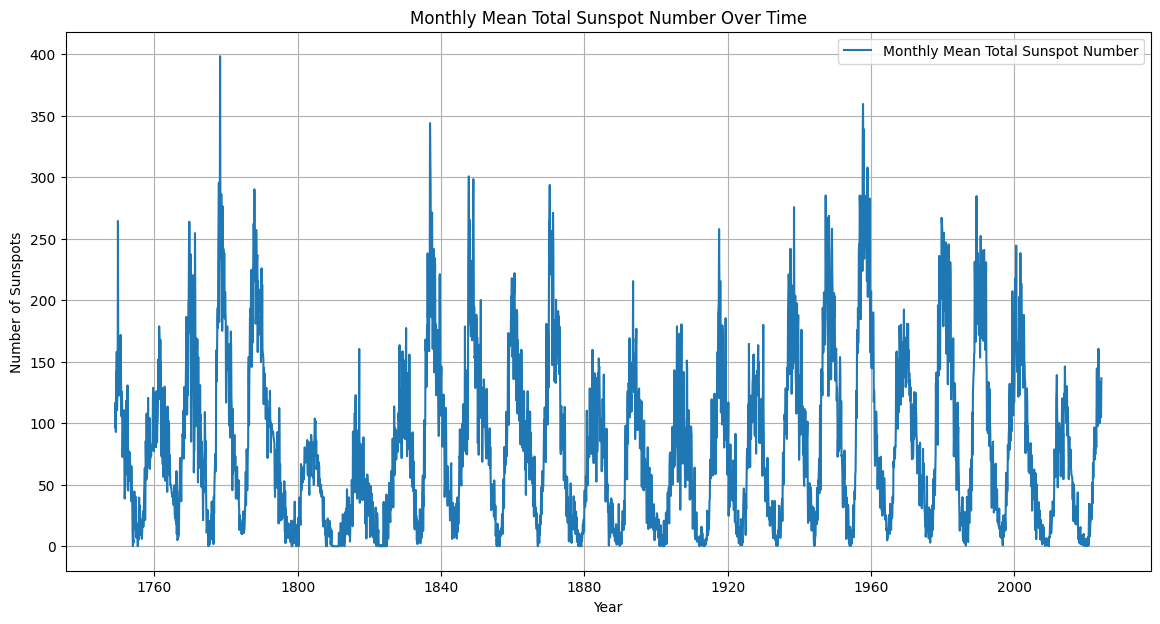

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
file_path = 'C:\我的文件\李保升的文件\Computational_Physics_Homework\week 13th\SN_m_tot_V2.0.csv'  
data = pd.read_csv(file_path, delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date in Fraction', 'Monthly Mean Total Sunspot Number', 'Standard Deviation', 'Number of Observations', 'Definitive/Provisional']

# 创建一个日期列
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# 绘制时间序列图
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Monthly Mean Total Sunspot Number'], label='Monthly Mean Total Sunspot Number')
plt.title('Monthly Mean Total Sunspot Number Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Sunspots')
plt.grid(True)
plt.legend()
plt.show()

# 分析太阳黑子的周期性
# 你可能需要进一步的统计分析或模型来估计下一个周期的月份


1.2  周期估计

<>:7: SyntaxWarning: invalid escape sequence '\C'
<>:7: SyntaxWarning: invalid escape sequence '\C'
C:\Users\dell\AppData\Local\Temp\ipykernel_16280\1203116376.py:7: SyntaxWarning: invalid escape sequence '\C'
  file_path = 'C:\我的文件\李保升的文件\Computational_Physics_Homework\week 13th\SN_m_tot_V2.0.csv'


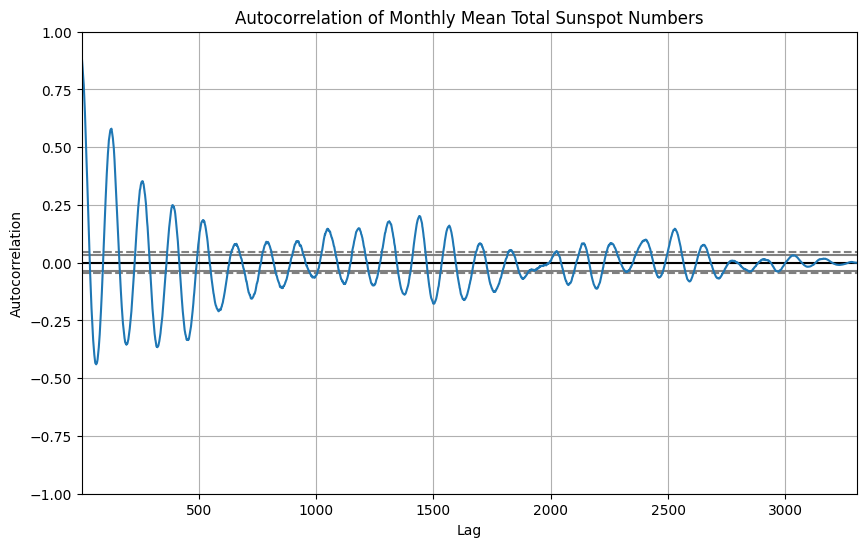

c:\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                       SARIMAX Results                                       
Dep. Variable:     Monthly Mean Total Sunspot Number   No. Observations:                 3304
Model:                                ARIMA(5, 1, 0)   Log Likelihood              -15330.015
Date:                               Tue, 21 May 2024   AIC                          30672.030
Time:                                       12:10:49   BIC                          30708.646
Sample:                                   01-01-1749   HQIC                         30685.137
                                        - 04-01-2024                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4155      0.013    -31.322      0.000      -0.442      -0.390
ar.L2      

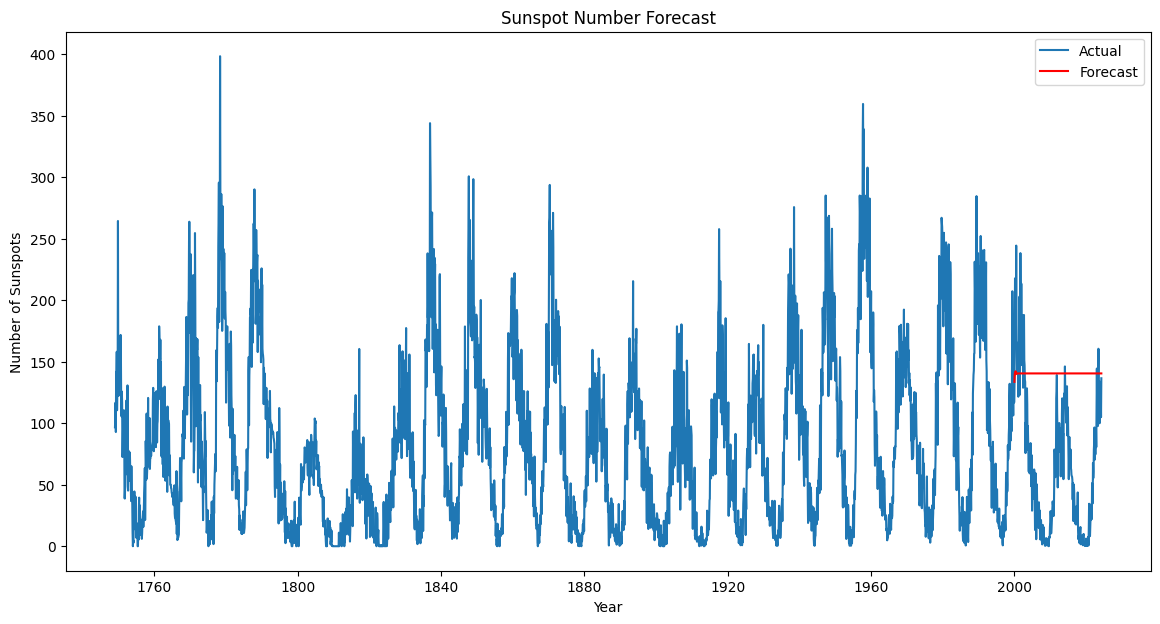

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

# 读取数据
file_path = 'C:\我的文件\李保升的文件\Computational_Physics_Homework\week 13th\SN_m_tot_V2.0.csv'  
data = pd.read_csv(file_path, delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date in Fraction', 'Monthly Mean Total Sunspot Number', 'Standard Deviation', 'Number of Observations', 'Definitive/Provisional']

# 创建日期索引
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))
data.set_index('Date', inplace=True)

# 简单的数据可视化，查看自相关图
plt.figure(figsize=(10, 6))
autocorrelation_plot(data['Monthly Mean Total Sunspot Number'])
plt.title('Autocorrelation of Monthly Mean Total Sunspot Numbers')
plt.show()

# 建立并拟合ARIMA模型
model = ARIMA(data['Monthly Mean Total Sunspot Number'], order=(5,1,0))
model_fit = model.fit()

# 输出模型摘要
print(model_fit.summary())

# 进行预测
data['Forecast'] = model_fit.predict(start=pd.to_datetime('2000-01-01'), end=pd.to_datetime('2030-12-01'), dynamic=True)

# 绘制预测结果
plt.figure(figsize=(14, 7))
plt.plot(data['Monthly Mean Total Sunspot Number'], label='Actual')
plt.plot(data['Forecast'], label='Forecast', color='red')
plt.title('Sunspot Number Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Sunspots')
plt.legend()
plt.show()


2.功率谱

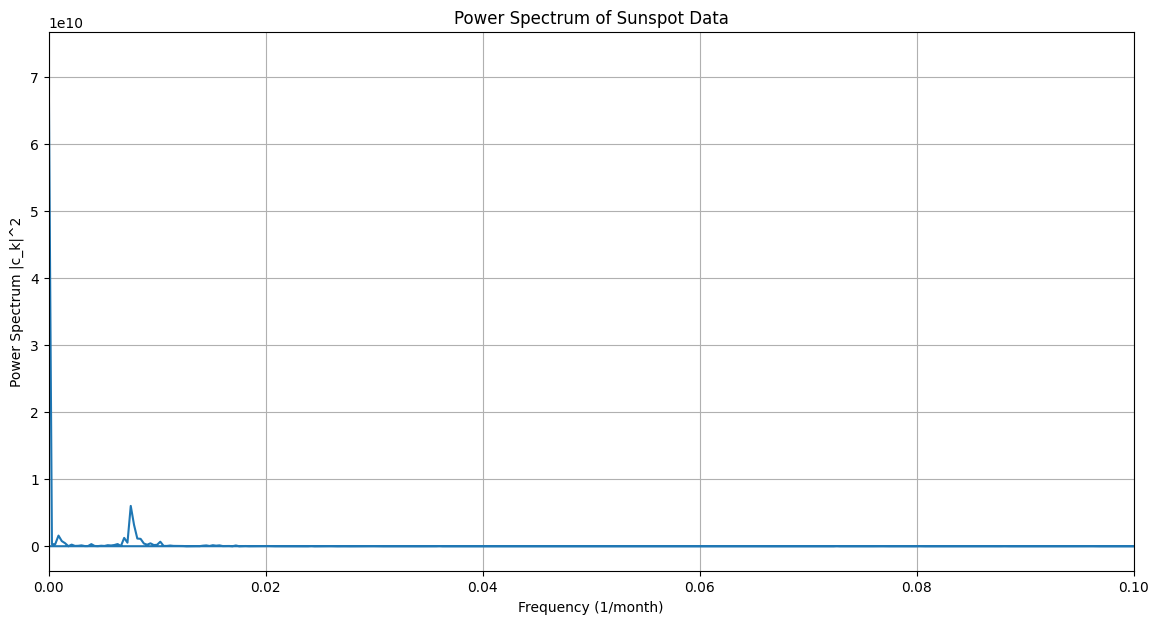

In [11]:
# 提取时间序列
time_series = data['Monthly Mean Total Sunspot Number'].values

# 进行傅里叶变换
fft_results = np.fft.fft(time_series)
frequencies = np.fft.fftfreq(len(fft_results), d=1)  # 假设每个样本间隔1个单位（例如1月）

# 计算功率谱
power_spectrum = np.abs(fft_results)**2

# 绘制功率谱图
plt.figure(figsize=(14, 7))
plt.plot(frequencies, power_spectrum)
plt.title('Power Spectrum of Sunspot Data')
plt.xlabel('Frequency (1/month)')
plt.ylabel('Power Spectrum |c_k|^2')
plt.xlim(0, 0.1)  # 限制显示的频率范围，提高可读性
plt.grid(True)
plt.show()


3.Testing

Dominant Frequency: 0.0076 1/month
Corresponding Period: 132.16 months


<>:7: SyntaxWarning: invalid escape sequence '\C'
<>:7: SyntaxWarning: invalid escape sequence '\C'
C:\Users\dell\AppData\Local\Temp\ipykernel_16280\3780995684.py:7: SyntaxWarning: invalid escape sequence '\C'
  file_path = 'C:\我的文件\李保升的文件\Computational_Physics_Homework\week 13th\SN_m_tot_V2.0.csv'


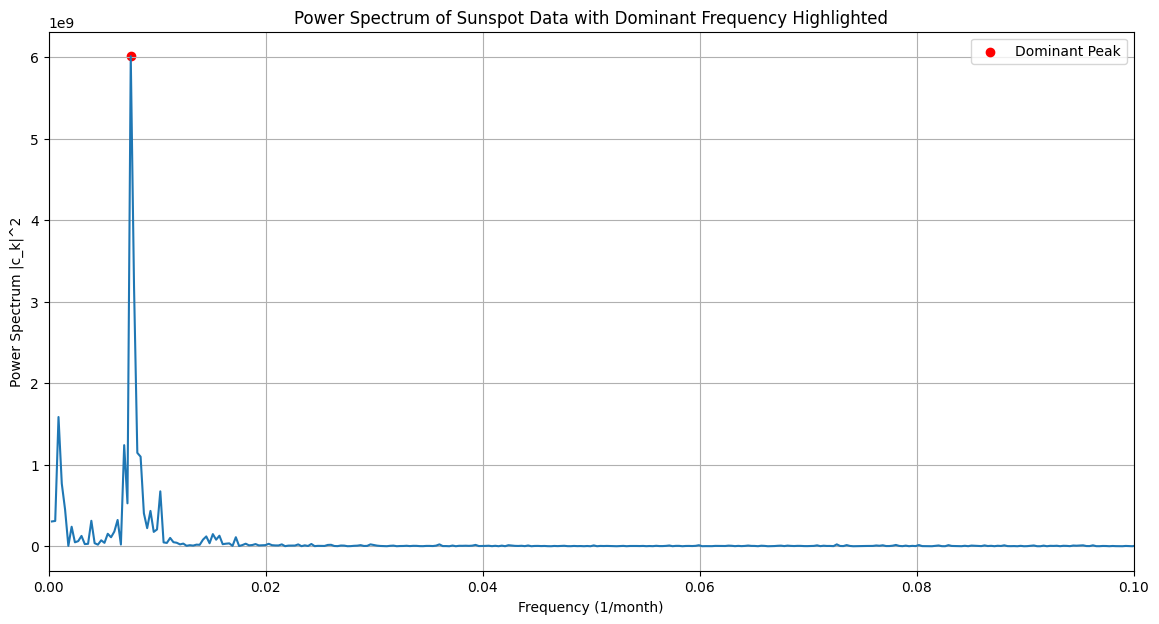

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# 读取CSV文件
file_path = 'C:\我的文件\李保升的文件\Computational_Physics_Homework\week 13th\SN_m_tot_V2.0.csv'  
data = pd.read_csv(file_path, delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date in Fraction', 'Monthly Mean Total Sunspot Number', 'Standard Deviation', 'Number of Observations', 'Definitive/Provisional']

# 创建一个日期列
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# 提取时间序列
time_series = data['Monthly Mean Total Sunspot Number'].values

# 进行傅里叶变换
fft_results = np.fft.fft(time_series)
frequencies = np.fft.fftfreq(len(fft_results), d=1)  # 假设每个样本间隔1个单位（例如1月）

# 计算功率谱
power_spectrum = np.abs(fft_results)**2

# 排除直流分量后找到最大功率的频率
valid_indices = frequencies > 0  # 排除直流分量
peak_indices, _ = find_peaks(power_spectrum[valid_indices])
dominant_freq = frequencies[valid_indices][peak_indices][np.argmax(power_spectrum[valid_indices][peak_indices])]

# 计算周期
dominant_period = 1 / dominant_freq

# 输出峰值频率和对应的周期
print("Dominant Frequency: {:.4f} 1/month".format(dominant_freq))
print("Corresponding Period: {:.2f} months".format(dominant_period))

# 绘制功率谱图并标记峰值
plt.figure(figsize=(14, 7))
plt.plot(frequencies[valid_indices], power_spectrum[valid_indices])
plt.scatter([dominant_freq], [power_spectrum[valid_indices][peak_indices][np.argmax(power_spectrum[valid_indices][peak_indices])]], color='red', label='Dominant Peak')
plt.title('Power Spectrum of Sunspot Data with Dominant Frequency Highlighted')
plt.xlabel('Frequency (1/month)')
plt.ylabel('Power Spectrum |c_k|^2')
plt.xlim(0, 0.1)  # 限制显示的频率范围，提高可读性
plt.legend()
plt.grid(True)
plt.show()


## Problem 6 傅里叶滤波和平滑

1. Draw pict

<>:5: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
C:\Users\dell\AppData\Local\Temp\ipykernel_16280\2434495000.py:5: SyntaxWarning: invalid escape sequence '\C'
  file_path = 'C:\我的文件\李保升的文件\Computational_Physics_Homework\week 13th\dow.txt'


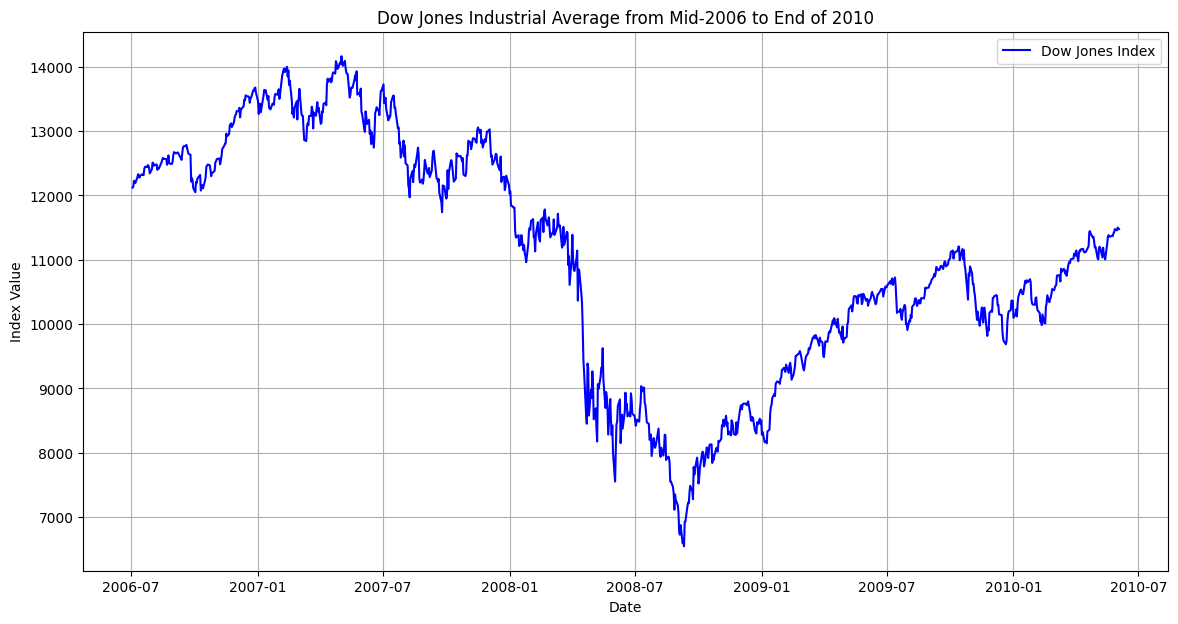

In [14]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'C:\我的文件\李保升的文件\Computational_Physics_Homework\week 13th\dow.txt'
dow_data = pd.read_csv(file_path, header=None, names=['Dow_Jones_Index'])

# Creating an index of dates, assuming data is daily starting from mid-2006
dates = pd.date_range(start='2006-07-01', periods=len(dow_data), freq='B')
dow_data['Date'] = dates

# Setting the date as the index
dow_data.set_index('Date', inplace=True)

# Plotting the data
plt.figure(figsize=(14, 7))
plt.plot(dow_data.index, dow_data['Dow_Jones_Index'], label='Dow Jones Index', color='blue')
plt.title('Dow Jones Industrial Average from Mid-2006 to End of 2010')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()


2.rfft计算离散傅里叶系数

In [15]:
import numpy as np
# Calculate the real-valued Fast Fourier Transform (rFFT) of the Dow Jones Index data
fft_coefficients = np.fft.rfft(dow_data['Dow_Jones_Index'])

# Output the result
fft_coefficients


array([ 1.12839039e+07+0.00000000e+00j,  6.84127740e+05-9.55087519e+05j,
       -4.19226205e+05+9.29089562e+04j,  7.41901498e+04-2.73812250e+05j,
       -3.51856811e+04+7.23658613e+04j,  1.11482643e+05-3.14779807e+04j,
        2.16752824e+04-2.45751549e+04j,  1.11224416e+04+2.47975704e+04j,
        3.11884665e+04+2.27868210e+04j,  7.38523102e+03-3.21233427e+04j,
       -3.39615972e+04-1.07833052e+05j, -1.23569569e+04+2.73171276e+04j,
        2.13837315e+04-9.16684147e+04j, -4.32441725e+04+9.92294540e+04j,
       -3.55753518e+03-2.54972743e+04j, -3.04367677e+04-1.72551151e+04j,
       -9.31799610e+03-2.49297658e+04j, -9.35033325e+03-1.75612302e+04j,
        1.17418062e+04+2.09235370e+04j,  4.22549031e+04-2.38143067e+03j,
        1.35294835e+04-3.06720066e+04j,  4.06499470e+03-2.87140744e+04j,
       -1.56146318e+04+2.24811825e+04j,  1.35756353e+04-1.28123867e+04j,
        1.20484888e+04+3.50866363e+03j, -1.55111478e+04-1.70617041e+04j,
        8.98307189e+03+4.49546331e+03j,  4.42970647

3.  数组重设置

In [16]:
# Calculate the number of elements corresponding to the top 10%
num_elements = len(fft_coefficients)
num_top_10_percent = int(0.1 * num_elements)

# Create a copy of the array to manipulate
filtered_fft_coefficients = np.copy(fft_coefficients)

# Set the last 90% of elements to zero
filtered_fft_coefficients[num_top_10_percent:] = 0

# Output the modified array
filtered_fft_coefficients


array([ 1.12839039e+07+0.00000000e+00j,  6.84127740e+05-9.55087519e+05j,
       -4.19226205e+05+9.29089562e+04j,  7.41901498e+04-2.73812250e+05j,
       -3.51856811e+04+7.23658613e+04j,  1.11482643e+05-3.14779807e+04j,
        2.16752824e+04-2.45751549e+04j,  1.11224416e+04+2.47975704e+04j,
        3.11884665e+04+2.27868210e+04j,  7.38523102e+03-3.21233427e+04j,
       -3.39615972e+04-1.07833052e+05j, -1.23569569e+04+2.73171276e+04j,
        2.13837315e+04-9.16684147e+04j, -4.32441725e+04+9.92294540e+04j,
       -3.55753518e+03-2.54972743e+04j, -3.04367677e+04-1.72551151e+04j,
       -9.31799610e+03-2.49297658e+04j, -9.35033325e+03-1.75612302e+04j,
        1.17418062e+04+2.09235370e+04j,  4.22549031e+04-2.38143067e+03j,
        1.35294835e+04-3.06720066e+04j,  4.06499470e+03-2.87140744e+04j,
       -1.56146318e+04+2.24811825e+04j,  1.35756353e+04-1.28123867e+04j,
        1.20484888e+04+3.50866363e+03j, -1.55111478e+04-1.70617041e+04j,
        8.98307189e+03+4.49546331e+03j,  4.42970647

4.  irfft对比分析

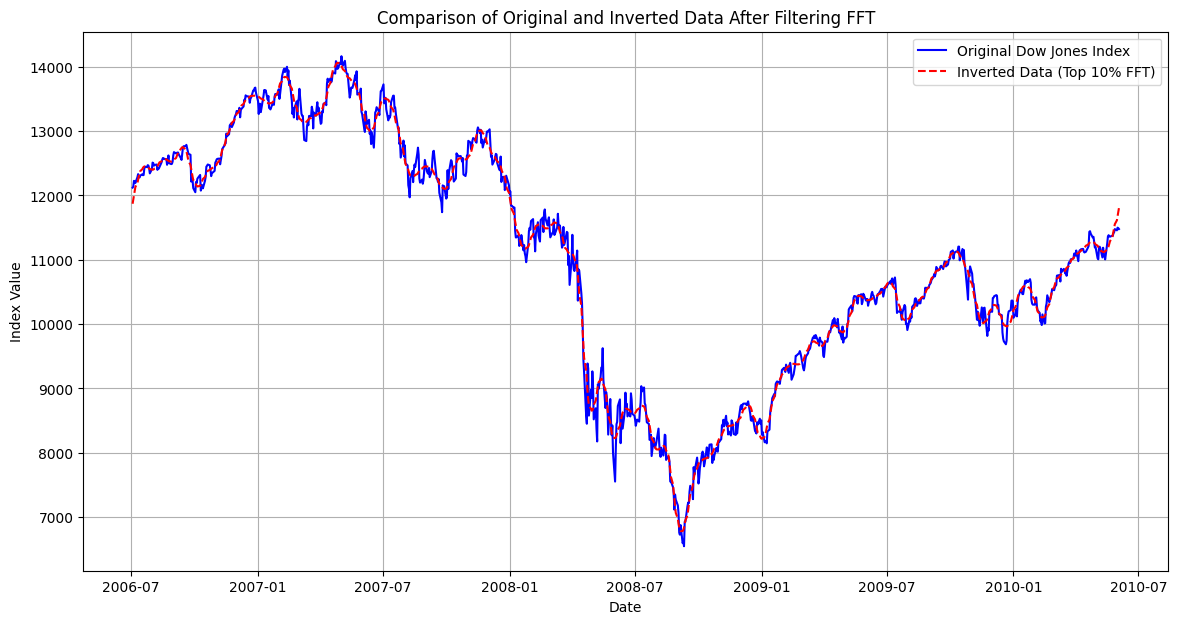

In [17]:
# Calculate the inverse real-valued Fast Fourier Transform (irFFT) of the filtered coefficients
inverted_data = np.fft.irfft(filtered_fft_coefficients)

# Plotting the original and the inverse FFT data on the same graph
plt.figure(figsize=(14, 7))
plt.plot(dow_data.index, dow_data['Dow_Jones_Index'], label='Original Dow Jones Index', color='blue')
plt.plot(dow_data.index[:len(inverted_data)], inverted_data, label='Inverted Data (Top 10% FFT)', color='red', linestyle='--')
plt.title('Comparison of Original and Inverted Data After Filtering FFT')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()


点评：从图中可以看出，保留前10%的系数的逆变换数据捕捉了原始数据的主要趋势和周期性，但细节和小的波动都丢失了。这是因为高频信息（通常对应于数据中的快速变化和噪声）在傅里叶变换系数被设置为0后被移除。通过仅保留前10%的傅里叶系数，我们实际上应用了一种低通滤波器，这有助于去除噪声和保留数据的基本模式，但也导致了数据的平滑和细节的丢失。这种方法在某些应用中，譬如去噪和数据压缩将会是非常有用的。

5. 更平滑分析

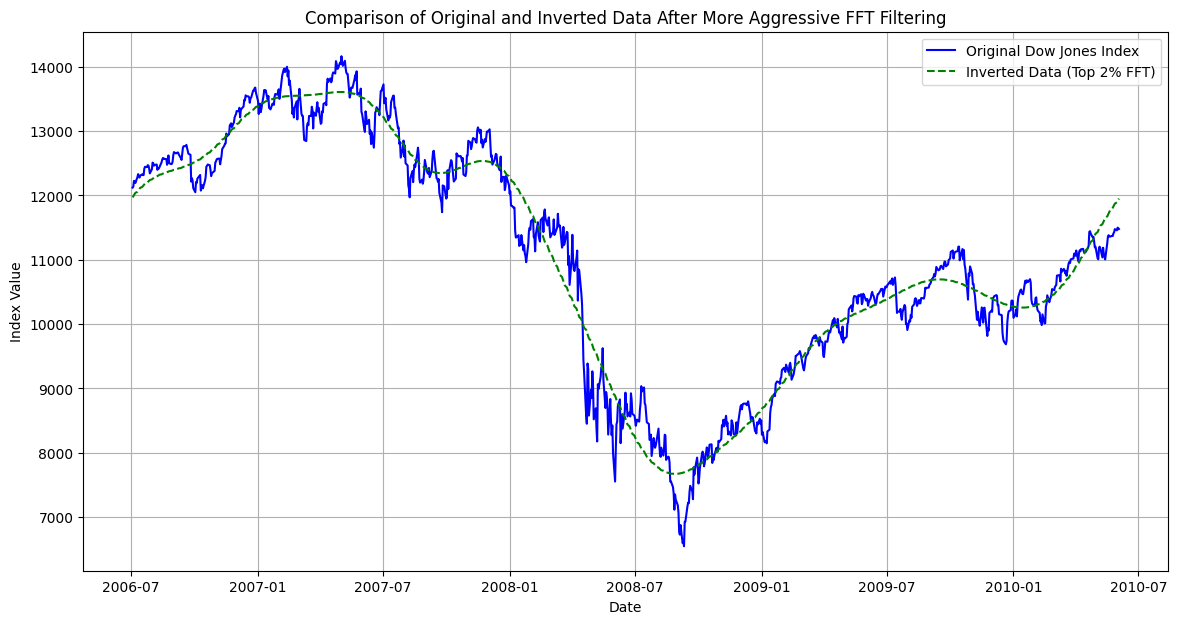

In [18]:
# Calculate the number of elements corresponding to the top 2%
num_top_2_percent = int(0.02 * num_elements)

# Create a copy of the array to manipulate, keeping only the top 2% of coefficients
filtered_fft_coefficients_2_percent = np.copy(fft_coefficients)
filtered_fft_coefficients_2_percent[num_top_2_percent:] = 0

# Calculate the inverse real-valued Fast Fourier Transform (irFFT) of the more aggressively filtered coefficients
inverted_data_2_percent = np.fft.irfft(filtered_fft_coefficients_2_percent)

# Plotting the original and the more filtered inverse FFT data on the same graph
plt.figure(figsize=(14, 7))
plt.plot(dow_data.index, dow_data['Dow_Jones_Index'], label='Original Dow Jones Index', color='blue')
plt.plot(dow_data.index[:len(inverted_data_2_percent)], inverted_data_2_percent, label='Inverted Data (Top 2% FFT)', color='green', linestyle='--')
plt.title('Comparison of Original and Inverted Data After More Aggressive FFT Filtering')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()


点评：在这幅图中，蓝线依然表示原始的道琼斯工业平均指数数据，绿色虚线则展示了仅保留前2%傅里叶变换系数进行逆变换后的结果。相比前一个10%的系数保留的情况，现在仅保留2%的系数使得结果更加平滑，几乎只捕捉到了数据的非常宽泛的长期趋势，丧失了更多的细节。这种更极端的过滤进一步去除了频率较高的组分，导致只有最主要的趋势得以保留。
这种方法在需要抽象出非常基础的趋势时有用，但同时也可能丢失重要的短期信息。